added path: /home/danielg/danigil/ModelXRay


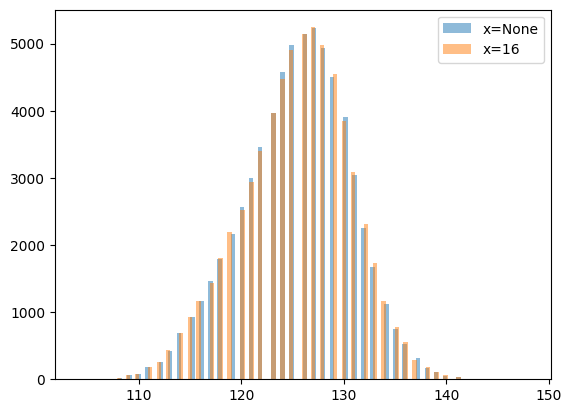

In [8]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
print('added path:', module_path)
if module_path not in sys.path:
    sys.path.append(module_path)


from model_xray.config_classes import *
from model_xray.zenml.pipelines.data_creation.dataset_compilation import compile_preprocessed_images_dataset

mz = "MobileNet"
pretrained_model_config = PretrainedModelConfig(name=mz, repo=ModelRepos.KERAS)
image_rep_config = ImageRepConfig(
    image_type = ImageType.GRAYSCALE_FOURPART,
)
image_preprocess_config = ImagePreprocessConfig(
    image_height=256,
    image_width=256,
)

# df_rows = []

x_vals = [None, 16]
for x in x_vals:
    X,y = compile_preprocessed_images_dataset(
        [pretrained_model_config],
        [x],
        image_rep_config=image_rep_config,
        image_preprocess_config=image_preprocess_config
    )

    plt.hist(X.ravel(), label=f'x={x}', alpha=0.5, bins=100)

    # df_rows.append({
    #     'img': X.ravel(),
    #     '#lsb': x,
    # })

plt.legend()
plt.show()
# df = pd.DataFrame(df_rows).fillna(0)